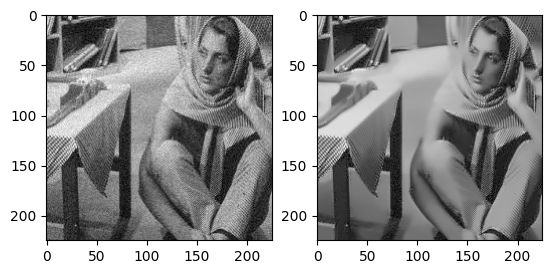

In [1]:
# Image Denoising in OpenCV
# 1. cv.fastNlMeansDenoisingColored() for the Image
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('/content/De.jpg')
dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)

plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(dst)
plt.show()

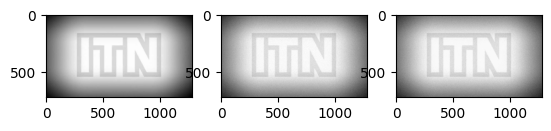

In [26]:
# 2. cv.fastNlMeansDenoisingMulti() For the video
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

cap = cv.VideoCapture(r'/content/test1.mp4')

# create a list of first 5 frames
img = [cap.read()[1] for i in range(5)]

# convert all to grayscale
gray = [cv.cvtColor(i, cv.COLOR_BGR2GRAY) for i in img]

# convert all to float64
gray = [np.float64(i) for i in gray]

# create a noise of variance 25
noise = np.random.randn(*gray[1].shape)*10

# Add this noise to images
noisy = [i+noise for i in gray]

# Convert back to uint8
noisy = [np.uint8(np.clip(i,0,255)) for i in noisy]

# Denoise 3rd frame considering all the 5 frames
dst = cv.fastNlMeansDenoisingMulti(noisy, 2, 5, None, 4, 7, 35)
plt.subplot(131),plt.imshow(gray[2],'gray')
plt.subplot(132),plt.imshow(noisy[2],'gray')
plt.subplot(133),plt.imshow(dst,'gray')
plt.show()

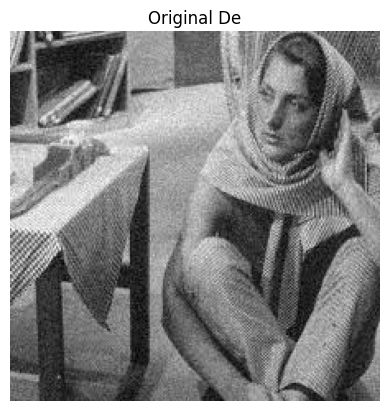

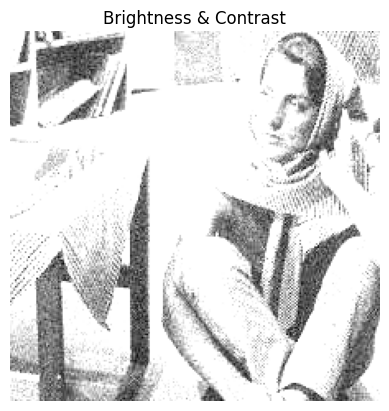

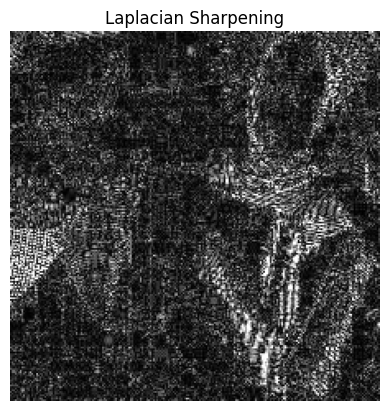

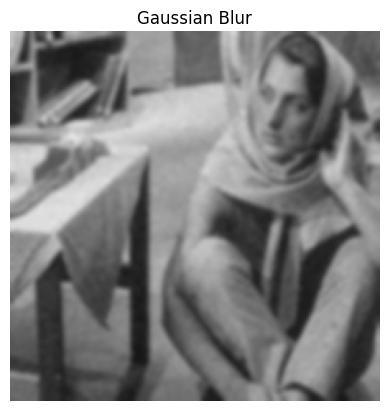

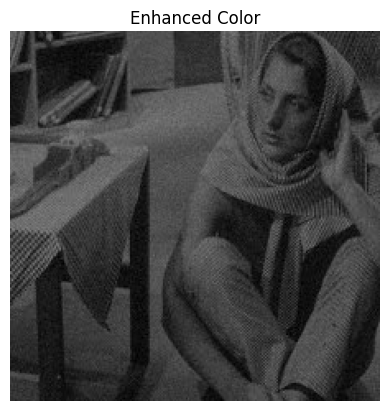

In [31]:
# Image Enhancement
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Function to enhance image brightness and contrast
def adjust_brightness_contrast(image, brightness=0, contrast=1):
    adjusted_image = cv2.addWeighted(image, contrast, np.zeros(image.shape, image.dtype), 0, brightness)
    return adjusted_image

# Load and plot the original image
def load_and_plot_image(image_path, title):
    image = cv2.imread(image_path)
    plt.title(title)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    return image

# Image paths
image_paths = ['/content/De.jpg']
titles = ['Original De']

# Load and plot original images
original_images = []
for path, title in zip(image_paths, titles):
    original_images.append(load_and_plot_image(path, title))

# Adjust brightness and contrast
adjusted_images = []
for image in original_images:
    adjusted_images.append(adjust_brightness_contrast(image, brightness=10, contrast=2.3))

# Plot adjusted images
for i, image in enumerate(adjusted_images):
    plt.subplot(1, len(adjusted_images), i+1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Brightness & Contrast")
    plt.axis('off')
plt.show()

# Sharpening using Laplacian operator
laplacian_sharpened_images = [cv2.convertScaleAbs(cv2.Laplacian(image, cv2.CV_64F)) for image in original_images]

# Plot sharpened images
for i, image in enumerate(laplacian_sharpened_images):
    plt.subplot(1, len(laplacian_sharpened_images), i+1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Laplacian Sharpening")
    plt.axis('off')
plt.show()


# Gaussian Blur for noise reduction
blurred_images = [cv2.GaussianBlur(image, (7, 7), 0) for image in original_images]

# Plot blurred images
for i, image in enumerate(blurred_images):
    plt.subplot(1, len(blurred_images), i+1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Gaussian Blur")
    plt.axis('off')
plt.show()

# Enhancing color
enhanced_color_images = []
for image in original_images:
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV).astype(np.float32)  # Convert to float32
    hsv_image[:, :, 0] *= 0.7  # Adjusting hue
    hsv_image[:, :, 1] *= 1.5  # Adjusting saturation
    hsv_image[:, :, 2] *= 0.5  # Adjusting value
    enhanced_color_images.append(cv2.cvtColor(hsv_image.astype(np.uint8), cv2.COLOR_HSV2BGR))  # Convert back to uint8

# Plot enhanced color images
for i, image in enumerate(enhanced_color_images):
    plt.subplot(1, len(enhanced_color_images), i+1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Enhanced Color")
    plt.axis('off')
plt.show()